![CDS 411 logo](../../img/cds-411-logo.png)

# Class 13: System dynamics models: Damped oscillator and bungee jumping III and shark competition model

---

![CC BY-SA 4.0 license](../../img/cc-by-sa.png)

This notebook is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).

## Load packages

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Adding drag to the model

### System dynamics diagram

<img src="../../img/bungee_jump_diagram.svg" width="600px">

In [2]:
import oscillator

### Run the simulations

In [3]:
undamped_df = oscillator.simulation(
    sim_time=5.0,
    delta_t=0.01,
    mass=0.2,
    spring_constant=10,
    unweighted_length=1.000,
    init_displacement=0.3,
    radius=None,
    mode="undamped",
)

In [4]:
damped_df = oscillator.simulation(
    sim_time=5.0,
    delta_t=0.01,
    mass=0.2,
    spring_constant=10,
    unweighted_length=1.000,
    init_displacement=0.3,
    radius=np.sqrt(0.10 / np.pi),
    mode="damped",
)

### Visualize results

In [5]:
simulation_df_new = pd.concat(
     [undamped_df[["time", "length", "velocity", "mode"]],
      damped_df[["time", "length", "velocity", "mode"]]],
    ignore_index=True
)


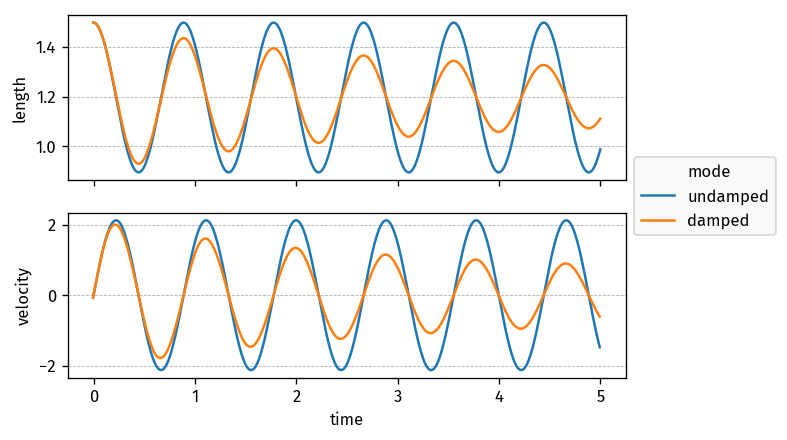

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=1, dpi=120, sharex=True)
sns.lineplot(x="time", y="length", hue="mode", data=simulation_df_new, ax=ax[0], legend=False)
sns.lineplot(x="time", y="velocity", hue="mode", data=simulation_df_new, ax=ax[1])
ax[1].legend(loc='center left', bbox_to_anchor=(1, 1.1));

## Bungee jumping model

In [7]:
import bungee

### Run the simulations

In [8]:
nodrag_df = bungee.simulation(
    sim_time=60,
    delta_t=0.01,
    mass=80,
    spring_constant=6,
    unweighted_length=30,
    radius=None,
    mode="no_drag",
)

In [9]:
withdrag_df = bungee.simulation(
    sim_time=60.0,
    delta_t=0.01,
    mass=80,
    spring_constant=6,
    unweighted_length=30,
    radius=np.sqrt(0.10/np.pi),
    mode="with_drag",
)

### Visualize results

In [10]:
bungee_df = pd.concat(
     [nodrag_df[["time", "length", "velocity", "mode"]],
      withdrag_df[["time", "length", "velocity", "mode"]]],
    ignore_index=True
)


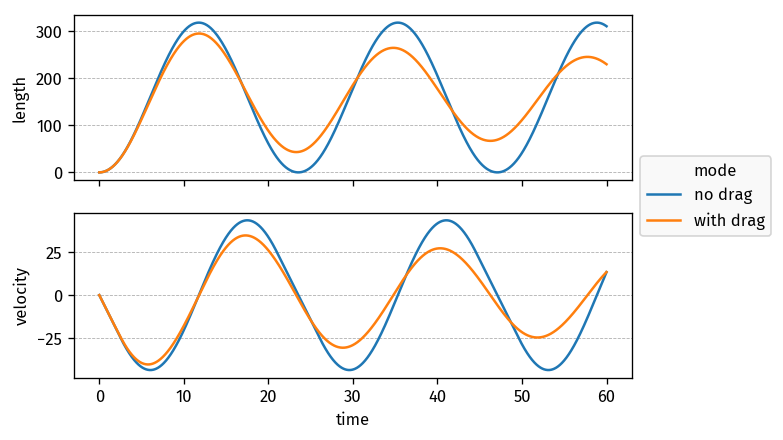

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=1, dpi=120, sharex=True)
sns.lineplot(x="time", y="length", hue="mode", data=bungee_df, ax=ax[0], legend=False)
sns.lineplot(x="time", y="velocity", hue="mode", data=bungee_df, ax=ax[1])
ax[1].legend(loc='center left', bbox_to_anchor=(1, 1.1));

## Shark competition model

### Implement the model yourself!

After our discussion where we carefully step through all the individual components of the model, take some of our earlier classroom code as a starting point, and try and implement this model yourself with the time we have left in class. Remember, the general workflow is the following:

1.  Identify the stocks and name them as Python variables
2.  Identify the constants and name them as Python variables
3.  Each stock will get its own *rate of change* formula. To find the formula for a stock, find all the flows that go into and out of the stock. Each flow arrow will contribute one term to the *rate of change* formula. Without a formula converter, all values that feed into a flow oval are multiplied together.
4.  Initialize the trace for the model.
5.  Set up a loop. Within the loop:
    1.  The *rate of change* formulas get updated within each loop of the simulation
    2.  Use the the numerical value for the *rate of change* formula in combination with the finite difference (Euler) equation to *update* the stocks
    3.  Update the trace for each stock
    4.  Repeat the loops until the simulation is finished.

In [12]:
# Instructor solution implemented in sharks.py
import sharks

### Run the simulation

In [13]:
sharks_df = sharks.simulation()

### Visualize results

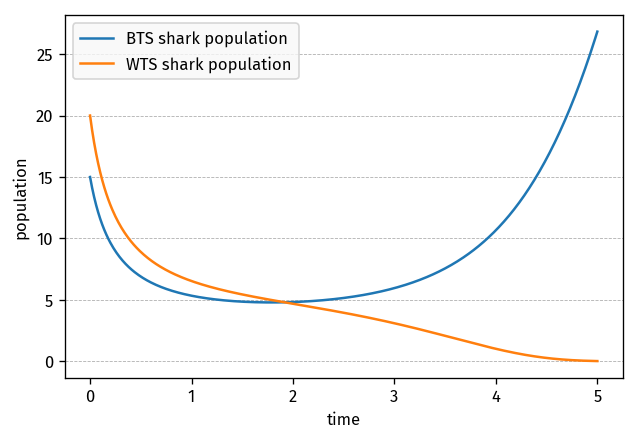

In [14]:
fig, ax = plt.subplots(dpi=120)
ax.plot(sharks_df["time"], sharks_df["bts"], "-", label="BTS shark population")
ax.plot(sharks_df["time"], sharks_df["wts"], "-", label="WTS shark population")
ax.set_xlabel("time")
ax.set_ylabel("population")
ax.legend(loc="best");